# Data Exploration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('VQA_data.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [ ]:
data['QID_para'].value_counts()

,count
QID_para,
freeform,1206
para,591
test_freeform,308
test_para,143


In [ ]:
data['IMAGEID'][0]

'https://medpix.nlm.nih.gov/images/full/synpic54610.jpg'

In [ ]:
data['img_index'] =data['IMAGEID'].str.extract(r'/([^/]+)$')

In [ ]:
data.head()

,QID_unique,QID_para,QID_linked,IMAGEID_case,IMAGEID,IMAGEORGAN,EVALUATION,QUESTION,Q_REPHASE,Q_RELATION,Q_FRAMED,Q_TYPE,ANSWER,A_TYPE,img_index
0,0,freeform,03f451ca-de62-4617-9679-e836026a7642,https://medpix.nlm.nih.gov/case?id=48e1dd0e-85...,https://medpix.nlm.nih.gov/images/full/synpic5...,HEAD,not evaluated,Are regions of the brain infarcted?,NaN,NaN,NaN,PRES,Yes,CLOSED,synpic54610.jpg
1,1,freeform,06e26b2c-04b9-42bc-8e98-1de30a0f7682,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,not evaluated,Are the lungs normal appearing?,NaN,NaN,NaN,ABN,No,CLOSED,synpic29265.jpg
2,2,freeform,0d0e8b6b-7753-4788-9b6d-dc7f25250c3f,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,not evaluated,Is there evidence of a pneumothorax,NaN,NaN,NaN,PRES,No,CLOSED,synpic29265.jpg
3,3,freeform,0e90b6bc-265f-490b-a039-509b9907a3cb,https://medpix.nlm.nih.gov/case?id=19aa8a2b-35...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,given,What type of imaging does this not represent?,NaN,NaN,NaN,MODALITY,ultrasound,OPEN,synpic28602.jpg
4,4,freeform,1179f612-12e0-4dda-aee0-f14a5200be7b,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,given,Is this a MRI of the chest?,NaN,NaN,NaN,MODALITY,no,CLOSED,synpic29265.jpg


In [ ]:
train_df = data[(data['QID_para'] == 'freeform') | (data['QID_para'] == 'para')]

In [ ]:
train_df.head()

,QID_unique,QID_para,QID_linked,IMAGEID_case,IMAGEID,IMAGEORGAN,EVALUATION,QUESTION,Q_REPHASE,Q_RELATION,Q_FRAMED,Q_TYPE,ANSWER,A_TYPE,img_index
0,0,freeform,03f451ca-de62-4617-9679-e836026a7642,https://medpix.nlm.nih.gov/case?id=48e1dd0e-85...,https://medpix.nlm.nih.gov/images/full/synpic5...,HEAD,not evaluated,Are regions of the brain infarcted?,NaN,NaN,NaN,PRES,Yes,CLOSED,synpic54610.jpg
1,1,freeform,06e26b2c-04b9-42bc-8e98-1de30a0f7682,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,not evaluated,Are the lungs normal appearing?,NaN,NaN,NaN,ABN,No,CLOSED,synpic29265.jpg
2,2,freeform,0d0e8b6b-7753-4788-9b6d-dc7f25250c3f,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,not evaluated,Is there evidence of a pneumothorax,NaN,NaN,NaN,PRES,No,CLOSED,synpic29265.jpg
3,3,freeform,0e90b6bc-265f-490b-a039-509b9907a3cb,https://medpix.nlm.nih.gov/case?id=19aa8a2b-35...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,given,What type of imaging does this not represent?,NaN,NaN,NaN,MODALITY,ultrasound,OPEN,synpic28602.jpg
4,4,freeform,1179f612-12e0-4dda-aee0-f14a5200be7b,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,given,Is this a MRI of the chest?,NaN,NaN,NaN,MODALITY,no,CLOSED,synpic29265.jpg


In [ ]:
train_df_new = train_df[train_df['A_TYPE'] != 'CLOSED ']

In [ ]:
train_df_new['A_TYPE'].value_counts()

,count
A_TYPE,
CLOSED,1025
OPEN,770


In [ ]:
test_df = data[(data['QID_para'] == 'test_freeform') | (data['QID_para'] == 'test_para')]

In [ ]:
test_df.head()

,QID_unique,QID_para,QID_linked,IMAGEID_case,IMAGEID,IMAGEORGAN,EVALUATION,QUESTION,Q_REPHASE,Q_RELATION,Q_FRAMED,Q_TYPE,ANSWER,A_TYPE,img_index
10,10,test_freeform,3fe4dfe4-015f-4a25-aa33-66c76918105a,https://medpix.nlm.nih.gov/case?id=31ac9c0f-73...,https://medpix.nlm.nih.gov/images/full/synpic4...,CHEST,not evaluated,Is there evidence of an aortic aneurysm?,NaN,NaN,NaN,PRES,yes,CLOSED,synpic42202.jpg
12,12,test_freeform,4f49fe02-5652-4f52-878f-dce6bb117bb9,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,not evaluated,Is there airspace consolidation on the left side?,NaN,NaN,NaN,PRES,Yes,CLOSED,synpic29265.jpg
13,13,test_freeform,512dce25-ab03-4df0-8663-a1b16a8a427b,https://medpix.nlm.nih.gov/case?id=48e1dd0e-85...,https://medpix.nlm.nih.gov/images/full/synpic5...,HEAD,given,Is this an axial plane?,NaN,NaN,NaN,PLANE,yes,CLOSED,synpic54610.jpg
19,19,test_freeform,9086a298-c1f4-44fb-ad69-772a30c4e97e,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,not evaluated,How is the patient oriented?,NaN,NaN,NaN,OTHER,Posterior-Anterior,OPEN,synpic29265.jpg
21,21,test_freeform,a325b7cb-2128-4c58-b108-3c5438b03181,https://medpix.nlm.nih.gov/case?id=48e1dd0e-85...,https://medpix.nlm.nih.gov/images/full/synpic5...,HEAD,not evaluated,Is there vascular pathology in this image?,NaN,NaN,NaN,ABN,yes,CLOSED,synpic54610.jpg


<ipython-input-13-44bad36a479f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df_new, x="A_TYPE", palette="pastel")


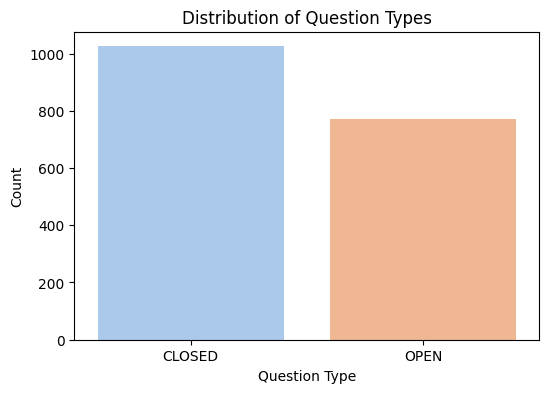

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df_new, x="A_TYPE", palette="pastel")
plt.title("Distribution of Question Types")
plt.xlabel("Question Type")
plt.ylabel("Count")
plt.show()

<ipython-input-14-08b4b8e9c3e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df_new, x="IMAGEORGAN", palette="pastel", order=train_df["IMAGEORGAN"].value_counts().index)


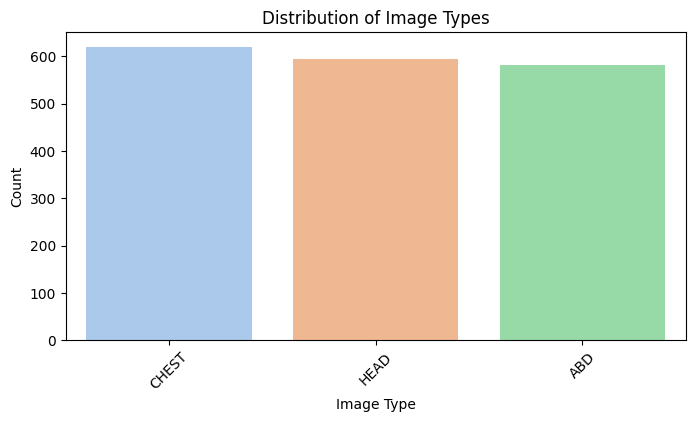

In [ ]:
# Countplot for image types
plt.figure(figsize=(8, 4))
sns.countplot(data=train_df_new, x="IMAGEORGAN", palette="pastel", order=train_df["IMAGEORGAN"].value_counts().index)
plt.title("Distribution of Image Types")
plt.xlabel("Image Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
train_df_new["QUESTION_count"] = train_df_new["QUESTION"].apply(lambda x: len(x.split()))
train_df_new["ANSWER_count"] = train_df_new["ANSWER"].apply(lambda x: len(str(x).split()))

<ipython-input-15-7e7a0fe40167>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_new["QUESTION_count"] = train_df_new["QUESTION"].apply(lambda x: len(x.split()))
<ipython-input-15-7e7a0fe40167>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_new["ANSWER_count"] = train_df_new["ANSWER"].apply(lambda x: len(str(x).split()))


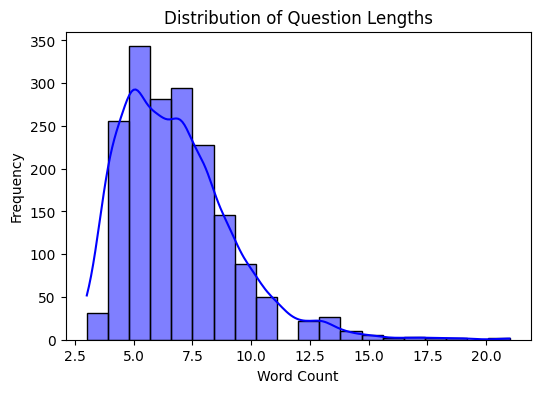

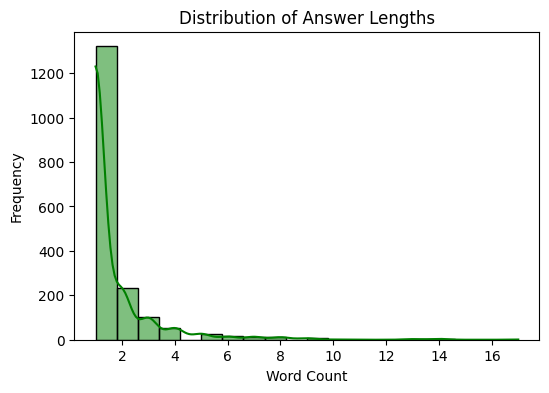

In [ ]:
# Distribution of question lengths
plt.figure(figsize=(6, 4))
sns.histplot(train_df_new["QUESTION_count"], kde=True, color="blue", bins=20)
plt.title("Distribution of Question Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Distribution of answer lengths
plt.figure(figsize=(6, 4))
sns.histplot(train_df_new["ANSWER_count"], kde=True, color="green", bins=20)
plt.title("Distribution of Answer Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

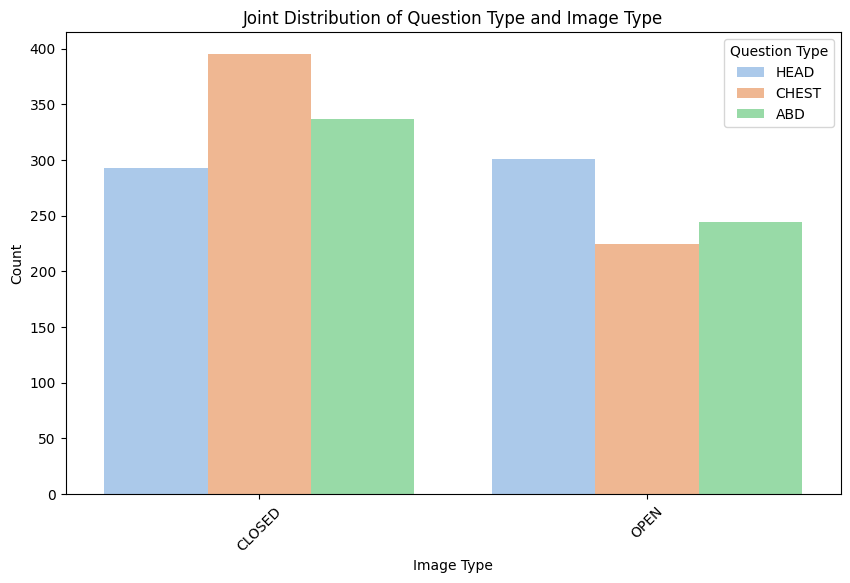

In [ ]:
# Grouped bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df_new, x="A_TYPE", hue="IMAGEORGAN", palette="pastel")
plt.title("Joint Distribution of Question Type and Image Type")
plt.xlabel("Image Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Question Type")
plt.show()

In [ ]:
train_df_new.head()

,QID_unique,QID_para,QID_linked,IMAGEID_case,IMAGEID,IMAGEORGAN,EVALUATION,QUESTION,Q_REPHASE,Q_RELATION,Q_FRAMED,Q_TYPE,ANSWER,A_TYPE,img_index,QUESTION_count,ANSWER_count
0,0,freeform,03f451ca-de62-4617-9679-e836026a7642,https://medpix.nlm.nih.gov/case?id=48e1dd0e-85...,https://medpix.nlm.nih.gov/images/full/synpic5...,HEAD,not evaluated,Are regions of the brain infarcted?,NaN,NaN,NaN,PRES,Yes,CLOSED,synpic54610.jpg,6,1
1,1,freeform,06e26b2c-04b9-42bc-8e98-1de30a0f7682,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,not evaluated,Are the lungs normal appearing?,NaN,NaN,NaN,ABN,No,CLOSED,synpic29265.jpg,5,1
2,2,freeform,0d0e8b6b-7753-4788-9b6d-dc7f25250c3f,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,not evaluated,Is there evidence of a pneumothorax,NaN,NaN,NaN,PRES,No,CLOSED,synpic29265.jpg,6,1
3,3,freeform,0e90b6bc-265f-490b-a039-509b9907a3cb,https://medpix.nlm.nih.gov/case?id=19aa8a2b-35...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,given,What type of imaging does this not represent?,NaN,NaN,NaN,MODALITY,ultrasound,OPEN,synpic28602.jpg,8,1
4,4,freeform,1179f612-12e0-4dda-aee0-f14a5200be7b,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,given,Is this a MRI of the chest?,NaN,NaN,NaN,MODALITY,no,CLOSED,synpic29265.jpg,7,1


In [ ]:
test_df.head()

,QID_unique,QID_para,QID_linked,IMAGEID_case,IMAGEID,IMAGEORGAN,EVALUATION,QUESTION,Q_REPHASE,Q_RELATION,Q_FRAMED,Q_TYPE,ANSWER,A_TYPE,img_index
10,10,test_freeform,3fe4dfe4-015f-4a25-aa33-66c76918105a,https://medpix.nlm.nih.gov/case?id=31ac9c0f-73...,https://medpix.nlm.nih.gov/images/full/synpic4...,CHEST,not evaluated,Is there evidence of an aortic aneurysm?,NaN,NaN,NaN,PRES,yes,CLOSED,synpic42202.jpg
12,12,test_freeform,4f49fe02-5652-4f52-878f-dce6bb117bb9,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,not evaluated,Is there airspace consolidation on the left side?,NaN,NaN,NaN,PRES,Yes,CLOSED,synpic29265.jpg
13,13,test_freeform,512dce25-ab03-4df0-8663-a1b16a8a427b,https://medpix.nlm.nih.gov/case?id=48e1dd0e-85...,https://medpix.nlm.nih.gov/images/full/synpic5...,HEAD,given,Is this an axial plane?,NaN,NaN,NaN,PLANE,yes,CLOSED,synpic54610.jpg
19,19,test_freeform,9086a298-c1f4-44fb-ad69-772a30c4e97e,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,not evaluated,How is the patient oriented?,NaN,NaN,NaN,OTHER,Posterior-Anterior,OPEN,synpic29265.jpg
21,21,test_freeform,a325b7cb-2128-4c58-b108-3c5438b03181,https://medpix.nlm.nih.gov/case?id=48e1dd0e-85...,https://medpix.nlm.nih.gov/images/full/synpic5...,HEAD,not evaluated,Is there vascular pathology in this image?,NaN,NaN,NaN,ABN,yes,CLOSED,synpic54610.jpg


In [ ]:
print("Checking for missing or invalid questions and answers...")
print(train_df_new["QUESTION"].isnull().sum(), "missing questions")
print(train_df_new["ANSWER"].isnull().sum(), "missing answers")

# Ensure all entries are strings
train_df_new["QUESTION"] = train_df_new["QUESTION"].astype(str)
train_df_new["ANSWER"] = train_df_new["ANSWER"].astype(str)

train_df_new = train_df_new.dropna(subset=["QUESTION", "ANSWER"])

Checking for missing or invalid questions and answers...
0 missing questions
1 missing answers


<ipython-input-20-83b4bdab38f0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_new["QUESTION"] = train_df_new["QUESTION"].astype(str)
<ipython-input-20-83b4bdab38f0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_new["ANSWER"] = train_df_new["ANSWER"].astype(str)


In [ ]:
!pip3 install bert_score

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForCausalLM, AdamW
from bert_score import score
import numpy as np

In [ ]:
class VisualQuestionDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length=128):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]

        # Load visual features
        path = './Visual_Features/' + 'features_img_' + row["img_index"] + '.npy'
        visual_features = np.load(path)
        visual_features = torch.tensor(visual_features.squeeze(), dtype=torch.float32)

        # Tokenize question
        question = row["QUESTION"]
        tokenized = self.tokenizer(
            question,
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt"
        )

        # Prepare labels
        answer = row["ANSWER"]
        answer_tokenized = self.tokenizer(
            answer,
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt"
        )

        return {
            "visual_features": visual_features,  # Pre-extracted visual features
            "input_ids": tokenized["input_ids"].squeeze(0),
            "attention_mask": tokenized["attention_mask"].squeeze(0),
            "labels": answer_tokenized["input_ids"].squeeze(0),
        }

In [ ]:
import torch.nn as nn

class BioGPTWithVisual(nn.Module):
    def __init__(self, biogpt_model_path, visual_dim=512):
        super(BioGPTWithVisual, self).__init__()
        self.biogpt = AutoModelForCausalLM.from_pretrained(biogpt_model_path)

        # Match visual projection output to BioGPT's embedding size
        self.embed_dim = self.biogpt.get_input_embeddings().embedding_dim
        self.visual_projection = nn.Linear(visual_dim, self.embed_dim)

    def forward(self, visual_features, input_ids, attention_mask, labels=None):
        # Project visual features
        projected_visual = self.visual_projection(visual_features).unsqueeze(1)

        # Token embeddings from BioGPT
        token_embeddings = self.biogpt.get_input_embeddings()(input_ids)

        # Combine visual and token embeddings
        combined_embeddings = torch.cat((projected_visual, token_embeddings), dim=1)

        # Adjust attention mask
        extended_attention_mask = torch.cat(
            (torch.ones(projected_visual.size(0), 1, dtype=attention_mask.dtype).to(attention_mask.device), attention_mask),
            dim=1
        )

        # Forward pass
        outputs = self.biogpt(
            inputs_embeds=combined_embeddings,
            attention_mask=extended_attention_mask,
            labels=labels
        )
        return outputs



In [ ]:
class BioGPTWithCrossAttention(nn.Module):
    def __init__(self, biogpt_model_path, visual_dim=512):
        super(BioGPTWithCrossAttention, self).__init__()
        self.biogpt = AutoModelForCausalLM.from_pretrained(biogpt_model_path)

        # Match visual projection output to BioGPT's embedding size
        self.embed_dim = self.biogpt.get_input_embeddings().embedding_dim
        self.visual_projection = nn.Linear(visual_dim, self.embed_dim)

        # Cross-attention layer
        self.cross_attention = nn.MultiheadAttention(embed_dim=self.embed_dim, num_heads=8, batch_first=True)

    def forward(self, visual_features, input_ids, attention_mask, labels=None):
        # Project visual features
        projected_visual = self.visual_projection(visual_features).unsqueeze(1)  # (batch_size, 1, embed_dim)

        # Token embeddings from BioGPT
        token_embeddings = self.biogpt.get_input_embeddings()(input_ids)  # (batch_size, seq_len, embed_dim)

        # Concatenate visual and text embeddings for cross-attention
        concatenated_embeddings = torch.cat((projected_visual, token_embeddings), dim=1)  # (batch_size, 1+seq_len, embed_dim)

        # Adjust attention mask
        extended_attention_mask = torch.cat(
            (torch.ones(projected_visual.size(0), 1, dtype= .dtype).to(attention_mask.device), attention_mask),
            dim=1
        )

        # Apply cross-attention
        attn_output, _ = self.cross_attention(
            query=concatenated_embeddings,
            key=concatenated_embeddings,
            value=concatenated_embeddings
        )

        # Forward pass through BioGPT with attention-processed embeddings
        outputs = self.biogpt(
            inputs_embeds=attn_output,
            attention_mask=extended_attention_mask
        )

        # Adjust labels if provided
        if labels is not None:
            batch_size, seq_length = input_ids.size()
            extended_labels = torch.full(
                (batch_size, seq_length + 1),  # Add one position for the visual feature
                fill_value=-100,              # Ignore index for visual token
                dtype=torch.long,
                device=labels.device
            )
            extended_labels[:, 1:] = labels  # Align labels with token embeddings
            return outputs, extended_labels

        return outputs


In [ ]:
!pip3 install sacremoses

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("microsoft/biogpt", padding_side="left")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
from torch.utils.data import DataLoader

# Prepare datasets and dataloaders
train_dataset = VisualQuestionDataset(train_df_new, tokenizer)
test_dataset = VisualQuestionDataset(test_df, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BioGPTWithCrossAttention("microsoft/biogpt").to(device)
optimizer = AdamW(model.parameters(), lr=5e-5)

def train_model(model, train_loader, optimizer, epochs=5):
    model.train()
    criterion = nn.CrossEntropyLoss(ignore_index=-100)
    for epoch in range(epochs):
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()

            # Move data to device
            visual_features = batch["visual_features"].to(device)
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            # Forward pass
            outputs, extended_labels = model(visual_features, input_ids, attention_mask, labels)
            logits = outputs.logits  # Extract logits from outputs

            # # Debug shapes
            # print(f"Logits shape: {logits.shape}")  # Should match extended_labels
            # print(f"Extended Labels shape: {extended_labels.shape}")

            # Compute loss
            loss = criterion(logits.view(-1, logits.size(-1)), extended_labels.view(-1))

            # Backward pass
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader)}")

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
train_model(model, train_loader, optimizer, epochs=50)

Epoch 1/50, Loss: 0.7140436317192184
Epoch 2/50, Loss: 0.13618796840310096
Epoch 3/50, Loss: 0.12156271795431772
Epoch 4/50, Loss: 0.11294137966301707
Epoch 5/50, Loss: 0.10726898928483328
Epoch 6/50, Loss: 0.1021374724391434
Epoch 7/50, Loss: 0.09710218785537614
Epoch 8/50, Loss: 0.09239868725339571
Epoch 9/50, Loss: 0.08624978293147352
Epoch 10/50, Loss: 0.08112303453187147
Epoch 11/50, Loss: 0.07897700097825792
Epoch 12/50, Loss: 0.07293449474291669
Epoch 13/50, Loss: 0.06762112765262525
Epoch 14/50, Loss: 0.06248339191906982
Epoch 15/50, Loss: 0.056810772037133576
Epoch 16/50, Loss: 0.05187779364693496
Epoch 17/50, Loss: 0.047170143930448424
Epoch 18/50, Loss: 0.04245228540566232
Epoch 19/50, Loss: 0.03710060375432173
Epoch 20/50, Loss: 0.03484006857602961
Epoch 21/50, Loss: 0.03352694509499189
Epoch 22/50, Loss: 0.029040817209105525
Epoch 23/50, Loss: 0.027122970495579973
Epoch 24/50, Loss: 0.02385003213201546
Epoch 25/50, Loss: 0.02123792841668344
Epoch 26/50, Loss: 0.02582790039

In [ ]:
def evaluate_model(model, test_loader, tokenizer):
    model.eval()
    predictions = []
    ground_truths = []

    with torch.no_grad():
        for batch in test_loader:
            # Move data to device
            visual_features = batch["visual_features"].to(device)
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            # Forward pass (labels are not provided during evaluation)
            outputs = model(visual_features, input_ids, attention_mask)

            # Ensure outputs contain logits
            if isinstance(outputs, tuple):  # Handle tuple outputs
                logits = outputs[0].logits
            else:  # If outputs directly contain logits
                logits = outputs.logits

            # Decode predictions
            pred_ids = torch.argmax(logits, dim=-1)  # Get predicted token IDs
            pred_ids = pred_ids[:, 1:]  # Skip the visual feature token
            pred_answers = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)

            # Decode ground truths
            true_answers = tokenizer.batch_decode(labels, skip_special_tokens=True)

            predictions.extend(pred_answers)
            ground_truths.extend(true_answers)

    # Evaluate using BERTScore or another metric
    from bert_score import score
    P, R, F1 = score(predictions, ground_truths, lang="en", rescale_with_baseline=True)
    print(f"BERTScore Precision: {P.mean().item()}")
    print(f"BERTScore Recall: {R.mean().item()}")
    print(f"BERTScore F1: {F1.mean().item()}")

    return predictions, ground_truths


In [ ]:
evaluate_model(model, test_loader, tokenizer)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore Precision: 0.47945502400398254
BERTScore Recall: 0.4946031868457794
BERTScore F1: 0.48490095138549805


(['No',
  'YNo',
  'yes',
  'Axial',
  'No',
  'No',
  'No',
  'Yes es',
  'No',
  'No',
  'Yes',
  'No',
  'yes',
  'yes',
  'es',
  'YYYYes',
  'yes',
  'Yes',
  'No',
  'Yes',
  'No',
  'Yes',
  'Yes',
  'No',
  'Y',
  'No',
  'Yes',
  'Yes',
  'YYes',
  'No',
  'Yes es',
  'es',
  'Yes',
  'Yes',
  'Yes',
  'YYes',
  'No',
  'Yes',
  'yes',
  'yes',
  'plaques',
  'Stomach bubble',
  'of of Flexof the bubble',
  'yes',
  'central',
  'infiltration',
  'yes',
  'Axial',
  'Normal',
  '2',
  'uminal fatty infiltration',
  'ureteral obstruction',
  'bulk',
  'bulk',
  'No',
  'No',
  '',
  'No',
  'Left temporal frontal lobe',
  'R hemidiaphragm',
  'XEomatous',
  'is,, and and T of x contour',
  'Widand lateral lateral viewed as of and as rays',
  'superior cajunction',
  'Right',
  'Yes',
  'Yes',
  'Yes',
  'No',
  'Yes',
  'chest x-ray',
  'yes',
  'YYYes',
  'Yes',
  'No',
  'Yes',
  'kidney',
  'One',
  'es',
  'Left',
  '',
  'YYes es',
  'No',
  'No',
  'etting',
  'No',
  'Ye

In [ ]:
def generate_answer(model, tokenizer, question, visual_feature_path):
    """
    Generate an answer for a given question and its associated visual features.

    Args:
        model: The trained BioGPTWithVisual model.
        tokenizer: Tokenizer used for the model.
        question: The input question (string).
        visual_feature_path: Path to the .npy file containing the visual features.

    Returns:
        Generated answer (string).
    """
    model.eval()

    # Load the visual features
    visual_features = np.load(visual_feature_path)
    visual_features = torch.tensor(visual_features.squeeze(), dtype=torch.float32).unsqueeze(0).to(device)

    # Project visual features
    projected_visual = model.visual_projection(visual_features).unsqueeze(1)

    # Tokenize the question
    tokenized_question = tokenizer(
        question,
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )
    input_ids = tokenized_question["input_ids"].to(device)
    attention_mask = tokenized_question["attention_mask"].to(device)

    # Get token embeddings
    token_embeddings = model.biogpt.get_input_embeddings()(input_ids)

    # Combine visual features with token embeddings
    combined_embeddings = torch.cat((projected_visual, token_embeddings), dim=1)

    # Extend the attention mask
    extended_attention_mask = torch.cat(
        (torch.ones(projected_visual.size(0), 1, dtype=attention_mask.dtype).to(device), attention_mask),
        dim=1
    )

    # Generate an answer
    outputs = model.biogpt.generate(
        inputs_embeds=combined_embeddings,
        attention_mask=extended_attention_mask,
        max_new_tokens=50,
        num_beams=3
    )

    # Decode the generated answer
    generated_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated_answer
